### New Yorker Fiction Scrape

In [28]:
import requests
import re
import lxml

In [31]:
"""Scrape the fiction links."""
metadata = []
base_url = 'https://www.newyorker.com/magazine/fiction/page/{}'
indices = range(150)
for i in indices:
    try:
        contents = requests.get(base_url.format(i)).content
        tree = html.fromstring(contents)
        titles = tree.xpath('//h4[@class="River__hed___re6RP"]/text()')
        titles = [re.sub(r'[^a-zA-Z ]+', '', t) for t in titles]
        authors = tree.xpath('//a[@rel="author"]/text()')
        links = [l for l in tree.xpath('//div[@class="River__riverItemBody___347sz"]//a[@class="Link__link___3dWao  "]/@href') if 'magazine' in l]
        assert len(titles) == len(authors)
        assert len(titles) == len(links)
        metadata += list(zip(titles, authors, links))
    except Exception as e:
        print(e)

In [86]:
"""Scrape the fiction body text from the links."""
base_url = 'https://www.newyorker.com/{}'
fiction = []

def body_text(raw_text):
    text = [t for t in raw_text if len(t) > 36]
    end = [i for (i, t) in enumerate(text) if '♦' in t]
    if len(end) < 1:
        return None
    end = end[0]
    text = text[:end]
    return text

for i, (t, a, l) in enumerate(metadata[:500]):
    print("Now on {}".format(i))
    try:
        contents = requests.get(base_url.format(l)).content
        tree = html.fromstring(contents)
        raw_text = tree.xpath('//p/text()')
        body = body_text(raw_text)
        if body is None: assert False
        fiction += [(t, a, l, body)]
    except Exception as e:
        print("Error on: ", t, a, l)

Now on 0
Now on 1
Now on 2
Now on 3
Now on 4
Now on 5
Now on 6
Error on:  Playing Metal Gear Solid V The Phantom Pain Jamil Jan Kochai /magazine/2020/01/06/playing-metal-gear-solid-v-the-phantom-pain
Now on 7
Now on 8
Now on 9
Now on 10
Now on 11
Now on 12
Now on 13
Now on 14
Now on 15
Now on 16
Error on:  Playing Metal Gear Solid V The Phantom Pain Jamil Jan Kochai /magazine/2020/01/06/playing-metal-gear-solid-v-the-phantom-pain
Now on 17
Now on 18
Now on 19
Now on 20
Error on:  The Curfew Roddy Doyle /magazine/2019/12/02/the-curfew
Now on 21
Now on 22
Error on:  The Trip Weike Wang /magazine/2019/11/18/the-trip
Now on 23
Now on 24
Now on 25
Now on 26
Now on 27
Now on 28
Now on 29
Error on:  The Fellow Joy Williams /magazine/2019/09/30/the-fellow
Now on 30
Now on 31
Now on 32
Now on 33
Error on:  To Do Kate Walbert /magazine/2019/09/02/to-do
Now on 34
Now on 35
Error on:  Elliott Spencer George Saunders /magazine/2019/08/19/elliott-spencer
Now on 36
Now on 37
Now on 38
Now on 39
Now o

Error on:  Asleep in the Lord Jeffrey Eugenides /magazine/2011/06/13/asleep-in-the-lord
Now on 442
Now on 443
Now on 444
Now on 445
Now on 446
Now on 447
Now on 448
Now on 449
Now on 450
Now on 451
Now on 452
Now on 453
Now on 454
Now on 455
Now on 456
Now on 457
Now on 458
Now on 459
Now on 460
Now on 461
Now on 462
Now on 463
Now on 464
Now on 465
Now on 466
Now on 467
Now on 468
Now on 469
Now on 470
Now on 471
Error on:  The Trojan Prince Tessa Hadley /magazine/2010/11/15/the-trojan-prince
Now on 472
Now on 473
Now on 474
Now on 475
Error on:  To the Measures Fall Richard Powers /magazine/2010/10/18/to-the-measures-fall
Now on 476
Now on 477
Now on 478
Now on 479
Now on 480
Error on:  Ash Roddy Doyle /magazine/2010/05/24/ash
Now on 481
Now on 482
Error on:  Uncle Rock Dagoberto Gilb /magazine/2010/05/10/uncle-rock
Now on 483
Now on 484
Error on:  Edgemont Drive E. L. Doctorow /magazine/2010/04/26/edgemont-drive
Now on 485
Now on 486
Now on 487
Now on 488
Now on 489
Now on 490
Now o

In [87]:
import pickle
with open('newyorker_fiction_raw.p', 'wb') as f:
    pickle.dump(fiction,f )

In [188]:
"""Grab body text with numbers."""
times = {
    'hours' : {k: [] for k in ['one', 'two', 'three', 'four', 'five', 'six', 'seven',
                         'eight', 'nine', 'ten', 'eleven', 'twelve']},
    'minutes' : {k: [] for k in ['zero', 'nothing', 'fifteen', 'thirty', 'forty-five', 'forty']},
    'special' : {k: [] for k in ['midnight', 'noon']}
}


def extract_times(times, body, title, author):
    for t in body:
        match_templates = [' {} ', ' {}, ', ' {}.']
        for time_type in times:
            for k in times[time_type]:
                for match_template in match_templates:
                    if match_template.format(k) in t:
                        # Clean up to make everything a sentence.
                        t = t.replace(' . . . ', '...')

                        splits = t.split(match_template.format(k))
                        for i in range(len(splits) - 1):
                            times[time_type][k].append(
                                (title, author, 
                                (splits[i], match_template.format(k), splits[i+1])
                                )
                            )
                            
                            
    return times

for i, (t, a, l, body) in enumerate(fiction):
    times = extract_times(times, body, t, a)

for time_type in times:
    for k in times[time_type]:
        print(k, len(times[time_type][k]))
        if len(times[time_type][k]) > 0:
            print(times[time_type][k][0])

one 7023
('With the Beatles', 'Haruki Murakami', ('There’s', ' one ', 'girl—a woman who used to be a girl, I mean—whom I remember well. I don’t know her name, though. And, naturally, I don’t know where she is now or what she’s doing. What I do know about her is that she went to the same high school as I did, and was in the same year (since the badge on her shirt was the same color as mine), and that she really liked the Beatles.'))
two 2700
('With the Beatles', 'Haruki Murakami', ('That was the only time I saw that girl. In the', ' two ', 'years between then and my graduation, we never once crossed paths again. Which is pretty strange if you think about it. The high school I attended was a fairly large public school at the top of a hill in Kobe, with about six hundred and fifty students in each grade. (We were the so-called baby-boomer generation, so there were a lot of us.) Not everyone knew one another. In fact, I didn’t know the names or recognize the vast majority of the kids in th

In [462]:
"""POS tag the times with templates for completion."""
fragment_templates = [
#     ('article', 'noun'), # (the, a, an); (noun)
#     ('pronoun be', '')
#         ('and', 'and'),
#         ('or', 'or'),
        ('pronoun_be', 'pronoun_be'),
        ('pronoun_has', 'pronoun_has'),
        ('pronoun_will', 'pronoun_will')
]

from collections import defaultdict
fragments = {time_type : {k : defaultdict(list) for k in times[time_type]} for time_type in times}

max_chars = 300
min_chars = 150
for time_type in times:
    for k in times[time_type]:
        for (title, author, (before, match, after)) in times[time_type][k]:
            # Break on conjunctions.
#             conjunctions = [' and ', ' or ']
            conjunctions = []
            pronoun_be = [' he was ', ' he is ', ' He was ', ' He is ', ' She was ', ' She is ', ' she is ', ' she was ', ' I am ', ' they are ', ' they were ']
            pronoun_has = [' he has ', ' she has ', ' they had ', ' I have ']
            pronoun_will = [' he will ', ' she will ', ' I will ', " He will ", " She will "]
            
            for splitter in conjunctions + pronoun_be + pronoun_has + pronoun_will:
                if time_type == 'hours':
                    before_splits = before.split(". ")
                    after_splits = after.split(splitter)
                    for i in range(1, len(after_splits)):
                        frag_end = splitter.join(after_splits[:i]) + splitter
                        if len(frag_end) > max_chars: continue
                        # Go backwards over the sentence starts.
                        for j in range(1, len(before_splits)):
                            frag_start = ". ".join(before_splits[::-1][:j][::-1])
                            if len(frag_start) + len(frag_end) > max_chars: continue
                            if len(frag_start) + len(frag_end) < min_chars: continue
                            
                            if splitter in conjunction:
                                lookup_key = splitter.strip()
                            if splitter in pronoun_be:
                                lookup_key = 'pronoun_be'
                            if splitter in pronoun_has:
                                lookup_key = 'pronoun_has'
                            if splitter in pronoun_will:
                                lookup_key = 'pronoun_will'
                                
                            fragments[time_type][k][lookup_key].append(
                                ((frag_start, match, frag_end), title, author)
                            )                   
                elif time_type == 'minutes':
                    # Whatever comes after the conjunction, and then next sentences.
                    before_splits = before.split(splitter)
                    after_splits = after.split(". ")
                    for j in range(1, len(before_splits)):
                        frag_start = splitter.join(before_splits[::-1][:j][::-1])
                        for i in range(1, len(after_splits)):
                            frag_end = ". ".join(after_splits[:i])
                            total_len = len(frag_start) + len(frag_end)
                            if total_len > min_chars and total_len < max_chars:
                                
                                if splitter in conjunction:
                                    lookup_key = splitter.strip()
                                if splitter in pronoun_be:
                                    lookup_key = 'pronoun_be'
                                if splitter in pronoun_has:
                                    lookup_key = 'pronoun_has'
                                if splitter in pronoun_will:
                                    lookup_key = 'pronoun_will'
                                
                                fragments[time_type][k][lookup_key].append(
                                ((frag_start, match, frag_end), title, author)
                            )
                elif time_type == 'special':
                    # Sentences for the special times.
                    splitter = '. '
                    before_splits = before.split(splitter)
                    after_splits = after.split(". ")
                    for j in range(1, len(before_splits)):
                        frag_start = splitter.join(before_splits[::-1][:j][::-1])
                        for i in range(1, len(after_splits)):
                            frag_end = ". ".join(after_splits[:i])
                            total_len = len(frag_start) + len(frag_end)
                            if total_len > min_chars and total_len < max_chars:                       
                                fragments[time_type][k]['special'].append(
                                ((frag_start, match, frag_end), title, author)
                            )
                    
        
    
    

In [463]:
# Combine all of the overloaded times.
can_combine = {
                    'forties' : ['forty-five', 'forty'],
                    'zeros' : ['zero', 'nothing']
                }
for t2_type in can_combine:
    for t2 in can_combine[t2_type]:
        other_types = [o for o in can_combine[t2_type] if o != t2]
        for time_type in fragments:
            for k in fragments[time_type]:
                if k == t2:
                    for frag_template in fragments[time_type][k]:
                        for o in other_types:
                            fragments[time_type][k][frag_template] += fragments[time_type][o][frag_template]

In [404]:
# Dump to JSON
import json
with open('newyorker_fragments.json', 'w') as f:
    data = {
        'fragments' : fragments,
        'fragment_templates': fragment_templates
    }
    json.dump(data, f)
    
with open('newyorker_fragments.json', 'r') as f:
    data = json.load(f)



('ten', 'forty-five')
(('“This trip? Six countries.” And', ' ten ', 'cities. “Oh, definitely. And I’m reading all I can find on it, and everyone’s talking about nothing else. Well, I only met literary types, no politicos, no experts. But of course I have '), 'Oktober', 'Martin Amis')
(('turned off the engine, there are hardly any other cars on the ferry, I wave to the ferryman and he waves back. I believe he’s been a ferryman here for', ' forty ', 'years. Summer is finally over'), 'Time for the Eyes to Adjust', 'Linn Ullmann')
['midnight']
(('She sleeps hard until', ' midnight, ', 'when a car in the driveway wakes her up. She’s not in bed but at her desk, half her toenails painted dark red, the computer printing a ninety-page document about the dangers of lead-based paint. Her pills can have that effect sometimes'), 'Shirley Temple Three', 'Thomas Pierce')
None


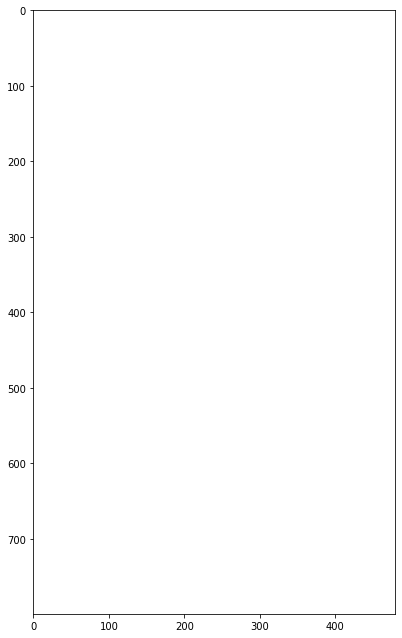

In [489]:
"""Templates for exquisite corpses"""
fragment_templates = [
        ('pronoun_be', 'pronoun_be'),
        ('pronoun_has', 'pronoun_has'),
        ('pronoun_will', 'pronoun_will')
]
def fragments_for_time(time, fragments, templates):
    """time: tuple of (hour_string, min_string) or (hour_string) for special times.
    :ret: tuple of fragment objects (frag1, frag2)
    """
    
    import numpy as np
    import random
    if len(time) == 1:
        # Special time -- noon or midnight
        frag1 = random.choice(fragments['special'][time[0]]['special'])
        return frag1, None
    else:
        t1, t2 = time
        frag1, frag2 = None, None
        while (frag1 is None or frag2 is None):
            try:
                distribution = np.array([
                    len(fragments['minutes'][t2][template2])
                    for (template1, template2) in templates
                ])

                distribution = distribution / np.sum(distribution)
                template_ind = np.random.choice(a=len(templates), p=distribution)
                template1, template2 = templates[template_ind]
                frag1 = random.choice(fragments['hours'][t1][template1])
                frag1 = frag1[0].lower() + frag1[1:]
                frag2 = random.choice(fragments['minutes'][t2][template2])
                if frag1 is None or frag2 is None:
                    assert False
            except:
                continue
            return (frag1, frag2)

"""Demo"""
import random
time_string = (random.choice(list(times['hours'].keys())),
            random.choice(list(times['minutes'].keys())))
frags = fragments_for_time(time_string, fragments, fragment_templates)

print(time_string)
frag1, frag2 = frags
print(frag1)
print(frag2)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (6.67, 11.11))
plt.imshow(img,interpolation='nearest')

test_time = [random.choice(list(times['special'].keys()))]
frag1, frag2 = fragments_for_time(test_time, fragments, fragment_templates)
print(test_time)
print(frag1)

print(frag2)




In [ ]:
"""TODO: render."""
def render(time_string, fragments, fragment_templates):
    frag1, frag2 = fragments_for_time(time_string, fragments, fragment_templates)
    CANVAS_SIZE = (480, 800)
    from PIL import Image, ImageDraw, ImageFont
    import os
    fonts_path = os.path.realpath('./fonts/')
    font = ImageFont.truetype(os.path.join(fonts_path, 'franklin_gothic_medium.ttf'), 20)

    canvas = Image.new('RGB', CANVAS_SIZE, color = 'white')
    if frag2 is None:
        continue
    else:
        
    return canvas
"""Demo image"""
img = render(time_string, fragments, fragment_templates)